# Début du projet avec nettoyage de base et analyse de la base

In [ ]:
import pandas as pd
import numpy as np


import seaborn as sns
import statsmodels.stats.outliers_influence as smo



In [ ]:
df=pd.read_table("construct_red.txt", delimiter = ',')
df

,TRIMESTRE,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,...,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho
0,2008Q4,CHR2,0.30%,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,...,72.754%,7.085%,35.122%,57.793%,39.213%,60.787%,Q42008,497736,1.760576,7.800000
1,2008Q4,CHR8,19.24%,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,...,32.075%,18.176%,54.180%,27.644%,54.851%,45.149%,Q42008,497736,1.760576,7.800000
2,2008Q4,Totale,2.40%,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,...,65.671%,10.289%,37.072%,52.639%,45.114%,54.886%,Q42008,497736,1.760576,7.800000
3,2009Q1,CHR2,0.25%,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,...,73.813%,6.823%,34.280%,58.897%,37.666%,62.334%,Q12009,489227,0.624887,8.600000
4,2009Q1,CHR8,14.36%,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,...,34.645%,17.730%,53.290%,28.980%,54.393%,45.607%,Q12009,489227,0.624887,8.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2014Q4,CHR8,14.20%,0.945045,0.954124,0.867099,0.890238,0.923678,0.976668,0.990908,...,38.054%,16.397%,55.033%,28.570%,44.520%,55.480%,Q4 2014,519315,0.277815,10.500000
74,2014Q4,Totale,1.48%,0.979524,0.993822,0.913891,0.941424,0.977598,0.998348,0.999386,...,69.769%,9.391%,37.528%,53.081%,39.363%,60.637%,Q4 2014,519315,0.277815,10.500000
75,2015Q1,CHR2,0.19%,0.994820,0.995156,0.992071,0.992495,0.993647,0.996268,0.996839,...,80.261%,7.295%,35.208%,57.497%,34.423%,65.577%,Q1 2015,522560,-0.240585,10.366667
76,2015Q1,CHR8,13.81%,0.944559,0.953416,0.866626,0.888926,0.922654,0.976460,0.990459,...,37.349%,16.617%,55.193%,28.190%,44.973%,55.027%,Q1 2015,522560,-0.240585,10.366667


In [ ]:
df['bonne_qualité'] = np.where(df['CHRONIQUE']== 'CHR2', 1, 0)
df.head()
df['mauvaise_qualité'] = np.where(df['CHRONIQUE']== 'CHR8', 1, 0)
df.head()
df['totalité_duportefeuille'] = np.where(df['CHRONIQUE']== 'Totale', 1, 0)
df.head()


,TRIMESTRE,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,...,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho,bonne_qualité,mauvaise_qualité,totalité_duportefeuille
0,2008Q4,CHR2,0.30%,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,...,57.793%,39.213%,60.787%,Q42008,497736,1.760576,7.8,1,0,0
1,2008Q4,CHR8,19.24%,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,...,27.644%,54.851%,45.149%,Q42008,497736,1.760576,7.8,0,1,0
2,2008Q4,Totale,2.40%,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,...,52.639%,45.114%,54.886%,Q42008,497736,1.760576,7.8,0,0,1
3,2009Q1,CHR2,0.25%,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,...,58.897%,37.666%,62.334%,Q12009,489227,0.624887,8.6,1,0,0
4,2009Q1,CHR8,14.36%,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,...,28.980%,54.393%,45.607%,Q12009,489227,0.624887,8.6,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 85 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRIMESTRE                78 non-null     object 
 1   CHRONIQUE                78 non-null     object 
 2   DR                       78 non-null     object 
 3   mean_1                   78 non-null     float64
 4   median_1                 78 non-null     float64
 5   p5_1                     78 non-null     float64
 6   p10_1                    78 non-null     float64
 7   p25_1                    78 non-null     float64
 8   p75_1                    78 non-null     float64
 9   p90_1                    78 non-null     float64
 10  p95_1                    78 non-null     float64
 11  mean_2                   78 non-null     int64  
 12  median_2                 78 non-null     int64  
 13  p5_2                     78 non-null     int64  
 14  p10_2                    78 

In [ ]:
# je convertis certaines variables xt object en float64
df['CD_TY_CLI_RCI_1'] = df['CD_TY_CLI_RCI_1'].str.rstrip("%").astype(float)

In [ ]:

df['CD_TY_CLI_RCI_2'] = df['CD_TY_CLI_RCI_2'].str.rstrip("%").astype(float)
df['CD_ETA_CIV_1'] = df['CD_ETA_CIV_1'].str.rstrip("%").astype(float)
df['CD_ETA_CIV_2'] = df['CD_ETA_CIV_2'].str.rstrip("%").astype(float)

df['CD_MOD_HABI_1'] = df['CD_MOD_HABI_1'].str.rstrip("%").astype(float)
df['CD_MOD_HABI_2'] = df['CD_MOD_HABI_2'].str.rstrip("%").astype(float)

df['CD_PROF_1'] = df['CD_PROF_1'].str.rstrip("%").astype(float)
df['CD_PROF_2'] = df['CD_PROF_2'].str.rstrip("%").astype(float)
df['CD_PROF_3'] = df['CD_PROF_3'].str.rstrip("%").astype(float)

df['CD_QUAL_VEH_1'] = df['CD_QUAL_VEH_1'].str.rstrip("%").astype(float)
df['CD_QUAL_VEH_2'] = df['CD_QUAL_VEH_2'].str.rstrip("%").astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 85 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRIMESTRE                78 non-null     object 
 1   CHRONIQUE                78 non-null     object 
 2   DR                       78 non-null     object 
 3   mean_1                   78 non-null     float64
 4   median_1                 78 non-null     float64
 5   p5_1                     78 non-null     float64
 6   p10_1                    78 non-null     float64
 7   p25_1                    78 non-null     float64
 8   p75_1                    78 non-null     float64
 9   p90_1                    78 non-null     float64
 10  p95_1                    78 non-null     float64
 11  mean_2                   78 non-null     int64  
 12  median_2                 78 non-null     int64  
 13  p5_2                     78 non-null     int64  
 14  p10_2                    78 

In [ ]:

df=df.drop(columns=['CHRONIQUE'])


In [ ]:
df.head()

,TRIMESTRE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,p95_1,...,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho,bonne_qualité,mauvaise_qualité,totalité_duportefeuille
0,2008Q4,0.30%,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,0.997023,...,57.793,39.213,60.787,Q42008,497736,1.760576,7.8,1,0,0
1,2008Q4,19.24%,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,0.994793,...,27.644,54.851,45.149,Q42008,497736,1.760576,7.8,0,1,0
2,2008Q4,2.40%,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,0.999539,...,52.639,45.114,54.886,Q42008,497736,1.760576,7.8,0,0,1
3,2009Q1,0.25%,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,0.997025,...,58.897,37.666,62.334,Q12009,489227,0.624887,8.6,1,0,0
4,2009Q1,14.36%,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,0.995656,...,28.980,54.393,45.607,Q12009,489227,0.624887,8.6,0,1,0


In [ ]:
df['TRIMESTRE']

0     2008Q4
1     2008Q4
2     2008Q4
3     2009Q1
4     2009Q1
       ...  
73    2014Q4
74    2014Q4
75    2015Q1
76    2015Q1
77    2015Q1
Name: TRIMESTRE, Length: 78, dtype: object

In [ ]:
df['Serie']=pd.to_datetime(df['TRIMESTRE'])
df

,TRIMESTRE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,p95_1,...,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho,bonne_qualité,mauvaise_qualité,totalité_duportefeuille,Serie
0,2008Q4,0.30%,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,0.997023,...,39.213,60.787,Q42008,497736,1.760576,7.800000,1,0,0,2008-10-01
1,2008Q4,19.24%,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,0.994793,...,54.851,45.149,Q42008,497736,1.760576,7.800000,0,1,0,2008-10-01
2,2008Q4,2.40%,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,0.999539,...,45.114,54.886,Q42008,497736,1.760576,7.800000,0,0,1,2008-10-01
3,2009Q1,0.25%,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,0.997025,...,37.666,62.334,Q12009,489227,0.624887,8.600000,1,0,0,2009-01-01
4,2009Q1,14.36%,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,0.995656,...,54.393,45.607,Q12009,489227,0.624887,8.600000,0,1,0,2009-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2014Q4,14.20%,0.945045,0.954124,0.867099,0.890238,0.923678,0.976668,0.990908,0.994970,...,44.520,55.480,Q4 2014,519315,0.277815,10.500000,0,1,0,2014-10-01
74,2014Q4,1.48%,0.979524,0.993822,0.913891,0.941424,0.977598,0.998348,0.999386,0.999632,...,39.363,60.637,Q4 2014,519315,0.277815,10.500000,0,0,1,2014-10-01
75,2015Q1,0.19%,0.994820,0.995156,0.992071,0.992495,0.993647,0.996268,0.996839,0.997004,...,34.423,65.577,Q1 2015,522560,-0.240585,10.366667,1,0,0,2015-01-01
76,2015Q1,13.81%,0.944559,0.953416,0.866626,0.888926,0.922654,0.976460,0.990459,0.994596,...,44.973,55.027,Q1 2015,522560,-0.240585,10.366667,0,1,0,2015-01-01


In [ ]:
df=df.drop(columns=['TRIMESTRE'])
df

,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,p95_1,mean_2,...,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho,bonne_qualité,mauvaise_qualité,totalité_duportefeuille,Serie
0,0.30%,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,0.997023,495,...,39.213,60.787,Q42008,497736,1.760576,7.800000,1,0,0,2008-10-01
1,19.24%,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,0.994793,147,...,54.851,45.149,Q42008,497736,1.760576,7.800000,0,1,0,2008-10-01
2,2.40%,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,0.999539,563,...,45.114,54.886,Q42008,497736,1.760576,7.800000,0,0,1,2008-10-01
3,0.25%,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,0.997025,515,...,37.666,62.334,Q12009,489227,0.624887,8.600000,1,0,0,2009-01-01
4,14.36%,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,0.995656,136,...,54.393,45.607,Q12009,489227,0.624887,8.600000,0,1,0,2009-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,14.20%,0.945045,0.954124,0.867099,0.890238,0.923678,0.976668,0.990908,0.994970,133,...,44.520,55.480,Q4 2014,519315,0.277815,10.500000,0,1,0,2014-10-01
74,1.48%,0.979524,0.993822,0.913891,0.941424,0.977598,0.998348,0.999386,0.999632,661,...,39.363,60.637,Q4 2014,519315,0.277815,10.500000,0,0,1,2014-10-01
75,0.19%,0.994820,0.995156,0.992071,0.992495,0.993647,0.996268,0.996839,0.997004,526,...,34.423,65.577,Q1 2015,522560,-0.240585,10.366667,1,0,0,2015-01-01
76,13.81%,0.944559,0.953416,0.866626,0.888926,0.922654,0.976460,0.990459,0.994596,126,...,44.973,55.027,Q1 2015,522560,-0.240585,10.366667,0,1,0,2015-01-01


In [ ]:
df['dtf']=pd.to_datetime(df['dtf_per_trt'], errors='coerce')
df=df.drop(columns=['dtf_per_trt'])

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df['DR'] = df['DR'].str.rstrip("%").astype(float)

<AxesSubplot:ylabel='bonne_qualité'>

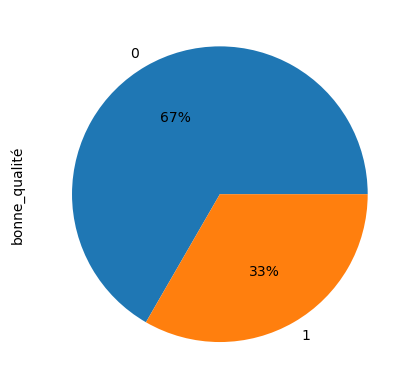

In [ ]:
import matplotlib as plt 
df["bonne_qualité"].value_counts().plot.pie(autopct='%1.0f%%')

<AxesSubplot:ylabel='mauvaise_qualité'>

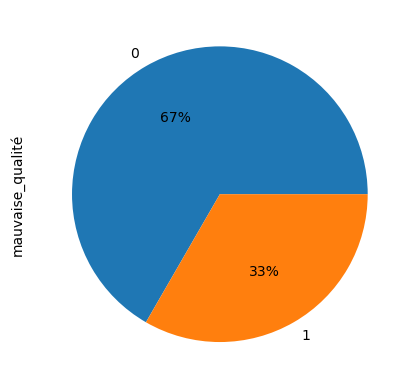

In [ ]:
import matplotlib as plt 
df["mauvaise_qualité"].value_counts().plot.pie(autopct='%1.0f%%')

<AxesSubplot:>

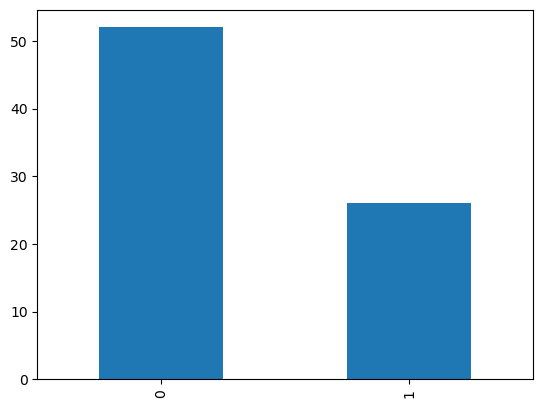

In [ ]:
df['bonne_qualité'].value_counts().plot(kind="bar")

In [ ]:
# Le but est de chosiir pour le modèle avec les variables xt, les variables pertinentes donc on va maintenant voir variables avec variables la corrélation.

###  ACP : récupération des facteurs explicatifs des chaque variable quatitative # Méthode 1 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler

features_1, features_2, features_3, features_4, features_5, features_6, features_7, features_8 = ["mean_1","median_1","p5_1","p10_1","p25_1","p75_1","p90_1","p95_1"],["mean_2","median_2","p5_2","p10_2","p25_2","p75_2","p90_2","p95_2"],["mean_3","median_3","p5_3","p10_3","p25_3","p75_3","p90_3","p95_3"],["mean_4","median_4","p5_4","p10_4","p25_4","p75_4","p90_4","p95_4"],["mean_5","median_5","p5_5","p10_5","p25_5","p75_5","p90_5","p95_5"],["mean_6","median_6","p5_6","p10_6","p25_6","p75_6","p90_6","p95_6"],["mean_7","median_7","p5_7","p10_7","p25_7","p75_7","p90_7","p95_7"],["mean_8","median_8,","p5_8","p10_8","p25_8","p75_8","p90_8","p95_8"]
all_features =[features_1, features_2, features_3, features_4, features_5, features_6, features_7, features_8]



scalar = StandardScaler()
scaled_data_1 = pd.DataFrame(scalar.fit_transform(df[["mean_1","median_1","p5_1","p10_1","p25_1","p75_1","p90_1","p95_1"]])) #scaling the data
scaled_data_2 = pd.DataFrame(scalar.fit_transform(df[["mean_2","median_2","p5_2","p10_2","p25_2","p75_2","p90_2","p95_2"]])) #scaling the data
scaled_data_3 = pd.DataFrame(scalar.fit_transform(df[["mean_3","median_3","p5_3","p10_3","p25_3","p75_3","p90_3","p95_3"]])) #scaling the data
scaled_data_4 = pd.DataFrame(scalar.fit_transform(df[["mean_4","median_4","p5_4","p10_4","p25_4","p75_4","p90_4","p95_4"]])) #scaling the data
scaled_data_5 = pd.DataFrame(scalar.fit_transform(df[["mean_5","median_5","p5_5","p10_5","p25_5","p75_5","p90_5","p95_5"]])) #scaling the data
scaled_data_6 = pd.DataFrame(scalar.fit_transform(df[["mean_6","median_6","p5_6","p10_6","p25_6","p75_6","p90_6","p95_6"]])) #scaling the data
scaled_data_7 = pd.DataFrame(scalar.fit_transform(df[["mean_7","median_7","p5_7","p10_7","p25_7","p75_7","p90_7","p95_7"]])) #scaling the data
scaled_data_8 = pd.DataFrame(scalar.fit_transform(df[["mean_8","median_8","p5_8","p10_8","p25_8","p75_8","p90_8","p95_8"]])) #scaling the data

print(scaled_data_1,
scaled_data_2,
scaled_data_3,
scaled_data_4,
scaled_data_5,
scaled_data_6,
scaled_data_7,
scaled_data_8)



#for i in range(9):
#    "scaled_data_" + str(i) = pd.DataFrame(scalar.fit_transform(df[["mean_{}".format(str(i)),"median_{}".format(str(i)),"p5_{}".format(str(i)),"p10_{}".format(str(i)),"p25_{}".format(str(i)),"p75_{}".format(str(i)),"p90_{}".format(str(i)),"p95_{}".format(str(i))]]))
#    print("scaled_data_" + str(i))


#Check the Co-relation between features without PCA
print(sns.heatmap(scaled_data.corr()))

           0         1         2         3         4         5         6  \
0   1.094601  0.751685  1.330360  1.239844  0.967424  0.597437  0.326846   
1  -1.440709 -1.552902 -1.168958 -1.384370 -1.488455 -1.626046 -1.597077   
2   0.076897  0.674954 -0.379427 -0.088035  0.421273  0.803324  1.012012   
3   1.091455  0.751682  1.330695  1.241097  0.967537  0.599153  0.326846   
4  -1.332756 -1.415992 -1.168958 -1.305296 -1.392119 -1.300391 -1.160227   
..       ...       ...       ...       ...       ...       ...       ...   
73 -1.474163 -1.544209 -1.247124 -1.384588 -1.526382 -1.555245 -1.400152   
74  0.304375  0.675117 -0.282133 -0.071333  0.394206  0.826966  1.059127   
75  1.093399  0.749702  1.330154  1.238948  0.965837  0.598443  0.320207   
76 -1.499228 -1.583745 -1.256875 -1.418239 -1.562863 -1.578093 -1.530278   
77  0.312915  0.674751 -0.272121 -0.068238  0.394440  0.829052  1.066936   

           7  
0  -0.101875  
1  -1.310254  
2   1.261583  
3  -0.100330  
4  -0.842507

NameError: name 'scaled_data' is not defined

In [ ]:

F = []
C = []
for i in range(1,9):
    pca = PCA(n_components = 6)
    pca.fit(locals()["scaled_data_"+str(i)])
    locals()["data_pca_"+str(i)] = pca.transform(locals()["scaled_data_"+str(i)])
    locals()["data_pca_"+str(i)] = pd.DataFrame(locals()["data_pca_"+str(i)],columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
    print(locals()["data_pca_"+str(i)])
    print(locals()["data_pca_"+str(i)].columns,pca.explained_variance_ratio_)
    F.append(locals()["data_pca_"+str(i)])
    C.append([locals()["data_pca_"+str(i)].columns,pca.explained_variance_ratio_][1])
    

         PC1       PC2       PC3       PC4       PC5       PC6
0  -2.232266 -1.223628  0.000828 -0.001237  0.000365 -0.002940
1   4.099784 -0.274501 -0.007509  0.009172  0.102055 -0.028594
2  -1.311881  1.520830 -0.108614  0.072946 -0.016643 -0.012387
3  -2.232766 -1.222341  0.000551  0.001996 -0.000985 -0.001439
4   3.533843  0.184151  0.114883  0.003687 -0.016598  0.007860
..       ...       ...       ...       ...       ...       ...
73  4.025544 -0.078421  0.001860 -0.022988 -0.019689 -0.030709
74 -1.463264  1.472456  0.029598 -0.069711  0.034372 -0.001891
75 -2.225233 -1.231357 -0.003905 -0.003125  0.000451  0.000666
76  4.190977 -0.231137 -0.085989 -0.064878 -0.009109  0.014133
77 -1.476895  1.473401  0.040972 -0.071713  0.033086 -0.001338

[78 rows x 6 columns]
Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], dtype='object') [8.49261709e-01 1.50117611e-01 2.95521823e-04 2.05083643e-04
 8.57850660e-05 1.63216868e-05]
         PC1       PC2       PC3       PC4       PC5       PC6

In [ ]:

##Applying PCA
##Taking no. of Principal Components as 3
#pca = PCA(n_components = 6)
#pca.fit(scaled_data)
#data_pca = pca.transform(scaled_data)
#data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
#data_pca


print(F, C)

[         PC1       PC2       PC3       PC4       PC5       PC6
0  -2.232266 -1.223628  0.000828 -0.001237  0.000365 -0.002940
1   4.099784 -0.274501 -0.007509  0.009172  0.102055 -0.028594
2  -1.311881  1.520830 -0.108614  0.072946 -0.016643 -0.012387
3  -2.232766 -1.222341  0.000551  0.001996 -0.000985 -0.001439
4   3.533843  0.184151  0.114883  0.003687 -0.016598  0.007860
..       ...       ...       ...       ...       ...       ...
73  4.025544 -0.078421  0.001860 -0.022988 -0.019689 -0.030709
74 -1.463264  1.472456  0.029598 -0.069711  0.034372 -0.001891
75 -2.225233 -1.231357 -0.003905 -0.003125  0.000451  0.000666
76  4.190977 -0.231137 -0.085989 -0.064878 -0.009109  0.014133
77 -1.476895  1.473401  0.040972 -0.071713  0.033086 -0.001338

[78 rows x 6 columns],          PC1       PC2       PC3       PC4       PC5       PC6
0   1.089624  1.125831  0.012466 -0.032313  0.155981  0.044297
1  -2.899492  0.540922 -0.036421  0.018167 -0.060843  0.035669
2   0.461393 -1.577067 -0.0790

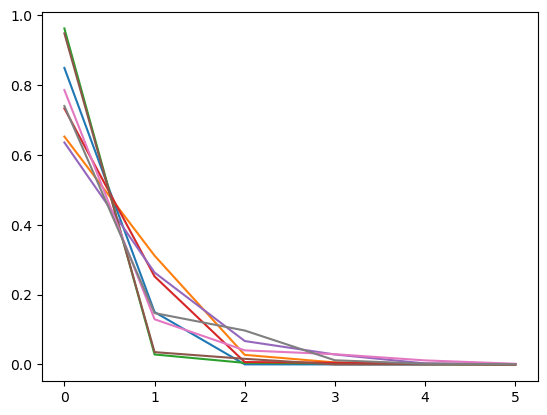

In [ ]:
plt.plot(pd.DataFrame(C).T)

In [ ]:
var_1 = pd.DataFrame(F[0])
var_2 = pd.DataFrame(F[1])
var_3 = pd.DataFrame(F[2])
var_4 = pd.DataFrame(F[3])
var_5 = pd.DataFrame(F[4])
var_6 = pd.DataFrame(F[5])
var_7 = pd.DataFrame(F[6])
var_8 = pd.DataFrame(F[7])

print(var_1,
var_2,
var_3,
var_4,
var_5,
var_6,
var_7,
var_8)

         PC1       PC2       PC3       PC4       PC5       PC6
0  -2.232266 -1.223628  0.000828 -0.001237  0.000365 -0.002940
1   4.099784 -0.274501 -0.007509  0.009172  0.102055 -0.028594
2  -1.311881  1.520830 -0.108614  0.072946 -0.016643 -0.012387
3  -2.232766 -1.222341  0.000551  0.001996 -0.000985 -0.001439
4   3.533843  0.184151  0.114883  0.003687 -0.016598  0.007860
..       ...       ...       ...       ...       ...       ...
73  4.025544 -0.078421  0.001860 -0.022988 -0.019689 -0.030709
74 -1.463264  1.472456  0.029598 -0.069711  0.034372 -0.001891
75 -2.225233 -1.231357 -0.003905 -0.003125  0.000451  0.000666
76  4.190977 -0.231137 -0.085989 -0.064878 -0.009109  0.014133
77 -1.476895  1.473401  0.040972 -0.071713  0.033086 -0.001338

[78 rows x 6 columns]          PC1       PC2       PC3       PC4       PC5       PC6
0   1.089624  1.125831  0.012466 -0.032313  0.155981  0.044297
1  -2.899492  0.540922 -0.036421  0.018167 -0.060843  0.035669
2   0.461393 -1.577067 -0.079087

In [ ]:
for i in range(1,9):
    locals()["var_"+str(i)] = locals()["var_"+str(i)].drop(columns = ['PC4','PC5','PC6'])
    my_string = "_"+str(i)
    locals()["var_"+str(i)].columns = [x + my_string for x in locals()["var_"+str(i)].columns]
    print(locals()["var_"+str(i)])


       PC1_1     PC2_1     PC3_1
0  -2.232266 -1.223628  0.000828
1   4.099784 -0.274501 -0.007509
2  -1.311881  1.520830 -0.108614
3  -2.232766 -1.222341  0.000551
4   3.533843  0.184151  0.114883
..       ...       ...       ...
73  4.025544 -0.078421  0.001860
74 -1.463264  1.472456  0.029598
75 -2.225233 -1.231357 -0.003905
76  4.190977 -0.231137 -0.085989
77 -1.476895  1.473401  0.040972

[78 rows x 3 columns]
       PC1_2     PC2_2     PC3_2
0   1.089624  1.125831  0.012466
1  -2.899492  0.540922 -0.036421
2   0.461393 -1.577067 -0.079087
3   1.191451  0.990374 -0.169646
4  -3.027076  0.522299 -0.034748
..       ...       ...       ...
73 -3.007251  0.604123 -0.047114
74  1.210691 -2.346317 -0.172268
75  1.215477  0.919967  0.375411
76 -3.096995  0.582216 -0.026167
77  1.139005 -2.391860 -0.165866

[78 rows x 3 columns]
       PC1_3     PC2_3     PC3_3
0  -2.230934 -0.436604 -0.095749
1  -1.394186  0.834479  0.121975
2   2.972799  0.799407  0.027467
3  -1.825423  0.316166  0.0108

In [ ]:
from functools import reduce    

data_list = [var_1,
                    var_2,
                    var_3,
                    var_4,
                    var_5,
                    var_6,
                    var_7,
                    var_8]

factors = reduce(lambda left, right: pd.merge(left , right, left_index=True, right_index=True, how = "outer"), data_list)

pd.DataFrame(factors)

,PC1_1,PC2_1,PC3_1,PC1_2,PC2_2,PC3_2,PC1_3,PC2_3,PC3_3,PC1_4,...,PC3_5,PC1_6,PC2_6,PC3_6,PC1_7,PC2_7,PC3_7,PC1_8,PC2_8,PC3_8
0,-2.232266,-1.223628,0.000828,1.089624,1.125831,0.012466,-2.230934,-0.436604,-0.095749,4.206635,...,1.420323,-2.239218,-0.229025,-0.380772,1.368791,-0.957002,-0.592480,-1.141050,4.966763,2.776671
1,4.099784,-0.274501,-0.007509,-2.899492,0.540922,-0.036421,-1.394186,0.834479,0.121975,-0.609780,...,1.151731,3.026073,1.590764,-0.412585,-2.903120,0.077889,0.561292,3.685395,1.630488,1.579174
2,-1.311881,1.520830,-0.108614,0.461393,-1.577067,-0.079087,2.972799,0.799407,0.027467,-2.329503,...,1.068712,-1.584297,0.237675,0.489355,-1.607917,-0.562930,0.395774,-0.681844,1.456581,-0.617744
3,-2.232766,-1.222341,0.000551,1.191451,0.990374,-0.169646,-1.825423,0.316166,0.010869,3.776537,...,1.370127,-2.239218,-0.229025,-0.380772,1.002805,-0.733820,-0.535770,-1.151674,4.206744,2.225527
4,3.533843,0.184151,0.114883,-3.027076,0.522299,-0.034748,-1.754748,0.280204,-0.020604,-0.672631,...,0.848884,3.022341,1.605517,-0.353846,-2.959448,0.143047,0.610037,3.568496,1.412747,1.353441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,4.025544,-0.078421,0.001860,-3.007251,0.604123,-0.047114,-1.656676,0.133502,0.310770,-0.518894,...,1.412194,3.992696,-0.864908,0.157650,-1.659492,0.649427,-0.382346,3.428660,-0.323779,-0.054767
74,-1.463264,1.472456,0.029598,1.210691,-2.346317,-0.172268,4.987615,1.041551,-0.168202,-2.136993,...,0.379027,-1.732145,0.135290,0.305080,-0.787094,-0.030283,-0.667774,-1.709336,0.448813,-0.997014
75,-2.225233,-1.231357,-0.003905,1.215477,0.919967,0.375411,-2.000508,-0.038387,0.013603,3.238509,...,-0.170420,-2.239291,-0.229052,-0.380775,3.065781,-1.026978,0.309491,-1.918920,-0.502333,0.140306
76,4.190977,-0.231137,-0.085989,-3.096995,0.582216,-0.026167,-1.723678,0.284763,0.064107,-0.222835,...,1.085500,4.029001,-0.842703,0.233811,-1.645670,0.639038,-0.387573,3.461536,-0.327407,-0.049899


In [ ]:
df_without_qtt_var = df.drop(columns=['mean_1','median_1','p5_1','p10_1','p25_1','p75_1','p90_1','p95_1','mean_2','median_2','p5_2','p10_2','p25_2','p75_2',
      'p90_2','p95_2','mean_3','median_3','p5_3','p10_3','p25_3','p75_3','p90_3','p95_3','mean_4','median_4','p5_4','p10_4',
      'p25_4','p75_4','p90_4','p95_4','mean_5','median_5','p5_5','p10_5','p25_5','p75_5','p90_5','p95_5','mean_6','median_6',
      'p5_6','p10_6','p25_6','p75_6','p90_6','p95_6','mean_7','median_7','p5_7','p10_7','p25_7','p75_7','p90_7','p95_7',
      'mean_8','median_8','p5_8','p10_8','p25_8','p75_8','p90_8','p95_8'])

df_without_qtt_var

,DR,CD_TY_CLI_RCI_1,CD_TY_CLI_RCI_2,CD_ETA_CIV_1,CD_ETA_CIV_2,CD_MOD_HABI_1,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,PIB,Inflation,Tx_cho,bonne_qualité,mauvaise_qualité,totalité_duportefeuille,Serie,dtf
0,0.30,0.533,99.467,36.926,63.074,27.246,72.754,7.085,35.122,57.793,39.213,60.787,497736,1.760576,7.800000,1,0,0,2008-10-01,NaT
1,19.24,4.827,95.173,64.012,35.988,67.925,32.075,18.176,54.180,27.644,54.851,45.149,497736,1.760576,7.800000,0,1,0,2008-10-01,NaT
2,2.40,4.511,95.489,41.879,58.121,34.329,65.671,10.289,37.072,52.639,45.114,54.886,497736,1.760576,7.800000,0,0,1,2008-10-01,NaT
3,0.25,0.501,99.499,35.910,64.090,26.187,73.813,6.823,34.280,58.897,37.666,62.334,489227,0.624887,8.600000,1,0,0,2009-01-01,NaT
4,14.36,5.147,94.853,62.686,37.314,65.355,34.645,17.730,53.290,28.980,54.393,45.607,489227,0.624887,8.600000,0,1,0,2009-01-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,14.20,4.451,95.549,65.621,34.379,61.946,38.054,16.397,55.033,28.570,44.520,55.480,519315,0.277815,10.500000,0,1,0,2014-10-01,NaT
74,1.48,3.775,96.225,44.217,55.783,30.231,69.769,9.391,37.528,53.081,39.363,60.637,519315,0.277815,10.500000,0,0,1,2014-10-01,NaT
75,0.19,0.571,99.429,38.970,61.030,19.739,80.261,7.295,35.208,57.497,34.423,65.577,522560,-0.240585,10.366667,1,0,0,2015-01-01,NaT
76,13.81,4.430,95.570,66.069,33.931,62.651,37.349,16.617,55.193,28.190,44.973,55.027,522560,-0.240585,10.366667,0,1,0,2015-01-01,NaT


In [ ]:
df_with_factors = pd.merge(df_without_qtt_var , factors, left_index=True, right_index=True, how = "outer")

df_factors = pd.DataFrame(df_with_factors)

df_factors

,DR,CD_TY_CLI_RCI_1,CD_TY_CLI_RCI_2,CD_ETA_CIV_1,CD_ETA_CIV_2,CD_MOD_HABI_1,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,...,PC3_5,PC1_6,PC2_6,PC3_6,PC1_7,PC2_7,PC3_7,PC1_8,PC2_8,PC3_8
0,0.30,0.533,99.467,36.926,63.074,27.246,72.754,7.085,35.122,57.793,...,1.420323,-2.239218,-0.229025,-0.380772,1.368791,-0.957002,-0.592480,-1.141050,4.966763,2.776671
1,19.24,4.827,95.173,64.012,35.988,67.925,32.075,18.176,54.180,27.644,...,1.151731,3.026073,1.590764,-0.412585,-2.903120,0.077889,0.561292,3.685395,1.630488,1.579174
2,2.40,4.511,95.489,41.879,58.121,34.329,65.671,10.289,37.072,52.639,...,1.068712,-1.584297,0.237675,0.489355,-1.607917,-0.562930,0.395774,-0.681844,1.456581,-0.617744
3,0.25,0.501,99.499,35.910,64.090,26.187,73.813,6.823,34.280,58.897,...,1.370127,-2.239218,-0.229025,-0.380772,1.002805,-0.733820,-0.535770,-1.151674,4.206744,2.225527
4,14.36,5.147,94.853,62.686,37.314,65.355,34.645,17.730,53.290,28.980,...,0.848884,3.022341,1.605517,-0.353846,-2.959448,0.143047,0.610037,3.568496,1.412747,1.353441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,14.20,4.451,95.549,65.621,34.379,61.946,38.054,16.397,55.033,28.570,...,1.412194,3.992696,-0.864908,0.157650,-1.659492,0.649427,-0.382346,3.428660,-0.323779,-0.054767
74,1.48,3.775,96.225,44.217,55.783,30.231,69.769,9.391,37.528,53.081,...,0.379027,-1.732145,0.135290,0.305080,-0.787094,-0.030283,-0.667774,-1.709336,0.448813,-0.997014
75,0.19,0.571,99.429,38.970,61.030,19.739,80.261,7.295,35.208,57.497,...,-0.170420,-2.239291,-0.229052,-0.380775,3.065781,-1.026978,0.309491,-1.918920,-0.502333,0.140306
76,13.81,4.430,95.570,66.069,33.931,62.651,37.349,16.617,55.193,28.190,...,1.085500,4.029001,-0.842703,0.233811,-1.645670,0.639038,-0.387573,3.461536,-0.327407,-0.049899


In [ ]:
df_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DR                       78 non-null     float64       
 1   CD_TY_CLI_RCI_1          78 non-null     float64       
 2   CD_TY_CLI_RCI_2          78 non-null     float64       
 3   CD_ETA_CIV_1             78 non-null     float64       
 4   CD_ETA_CIV_2             78 non-null     float64       
 5   CD_MOD_HABI_1            78 non-null     float64       
 6   CD_MOD_HABI_2            78 non-null     float64       
 7   CD_PROF_1                78 non-null     float64       
 8   CD_PROF_2                78 non-null     float64       
 9   CD_PROF_3                78 non-null     float64       
 10  CD_QUAL_VEH_1            78 non-null     float64       
 11  CD_QUAL_VEH_2            78 non-null     float64       
 12  PIB                      78 non-null  

# Corrélation

<AxesSubplot:>

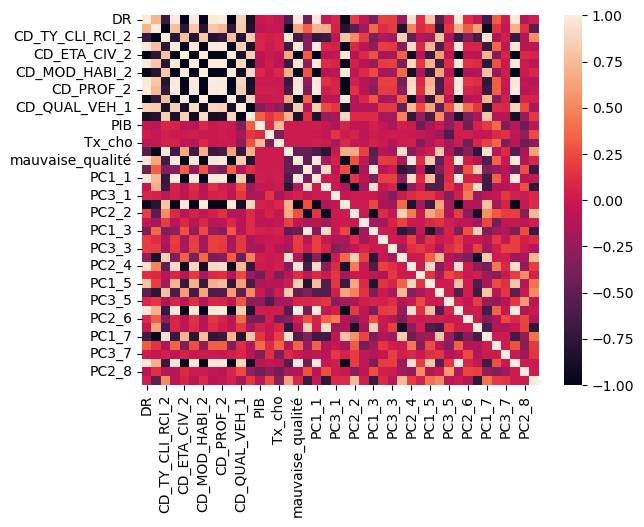

In [ ]:
sns.heatmap(df_factors.corr())

In [ ]:
MIS_corr_fact = df_factors.corr(method='spearman')
print(MIS_corr["DR"].sort_values(ascending=True))

CD_MOD_HABI_2             -0.968733
PC1_7                     -0.956438
CD_QUAL_VEH_2             -0.938768
PC1_2                     -0.938237
CD_TY_CLI_RCI_2           -0.911161
CD_PROF_3                 -0.879970
CD_ETA_CIV_2              -0.817923
bonne_qualité             -0.816760
PC2_5                     -0.732039
PC1_4                     -0.460229
PC2_2                     -0.337250
PC3_8                     -0.279750
PIB                       -0.226914
Tx_cho                    -0.215571
totalité_duportefeuille    0.000000
Inflation                  0.026238
PC2_3                      0.062965
PC3_5                      0.153769
PC3_7                      0.165887
PC3_1                      0.174779
PC2_6                      0.221869
PC3_2                      0.284113
PC1_3                      0.293210
PC2_8                      0.307792
PC3_6                      0.321759
PC3_3                      0.339023
PC3_4                      0.341306
PC2_7                      0

In [ ]:
comedy_high = MIS_corr_fact['DR'].nlargest(60)
comedy_high

DR                         1.000000
CD_MOD_HABI_1              0.968733
PC1_6                      0.943352
CD_QUAL_VEH_1              0.938768
CD_TY_CLI_RCI_1            0.911161
PC1_8                      0.893208
CD_PROF_2                  0.884663
CD_PROF_1                  0.880129
PC1_1                      0.851935
CD_ETA_CIV_1               0.817923
mauvaise_qualité           0.816760
PC1_5                      0.503048
PC2_4                      0.447745
PC2_1                      0.442246
PC2_7                      0.406008
PC3_4                      0.341306
PC3_3                      0.339023
PC3_6                      0.321759
PC2_8                      0.307792
PC1_3                      0.293210
PC3_2                      0.284113
PC2_6                      0.221869
PC3_1                      0.174779
PC3_7                      0.165887
PC3_5                      0.153769
PC2_3                      0.062965
Inflation                  0.026238
totalité_duportefeuille    0

In [ ]:
MIS_corr_fact_ = df_factors.corr(method='spearman')
comedy_high = MIS_corr_fact_['DR'].nlargest(60)
comedy_high

DR                         1.000000
CD_MOD_HABI_1              0.968733
PC1_6                      0.943352
CD_QUAL_VEH_1              0.938768
CD_TY_CLI_RCI_1            0.911161
PC1_8                      0.893208
CD_PROF_2                  0.884663
CD_PROF_1                  0.880129
PC1_1                      0.851935
CD_ETA_CIV_1               0.817923
mauvaise_qualité           0.816760
PC1_5                      0.503048
PC2_4                      0.447745
PC2_1                      0.442246
PC2_7                      0.406008
PC3_4                      0.341306
PC3_3                      0.339023
PC3_6                      0.321759
PC2_8                      0.307792
PC1_3                      0.293210
PC3_2                      0.284113
PC2_6                      0.221869
PC3_1                      0.174779
PC3_7                      0.165887
PC3_5                      0.153769
PC2_3                      0.062965
Inflation                  0.026238
totalité_duportefeuille    0

# Analyse Univariée

In [ ]:
# dans cette partie, on va réaliser une analyse statistique sur yt et xt

In [ ]:
# stat descriptive pour yt
import pandas 
df_factors.DR.describe()

count    78.000000
mean      5.584103
std       6.628957
min       0.170000
25%       0.242500
50%       1.665000
75%      14.177500
max      19.240000
Name: DR, dtype: float64

In [ ]:
# stat descriptive pour les xt
                  
x.describe()

,CD_TY_CLI_RCI_1,CD_TY_CLI_RCI_2,CD_ETA_CIV_1,CD_ETA_CIV_2,CD_MOD_HABI_1,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,...,PC3_5,PC1_6,PC2_6,PC3_6,PC1_7,PC2_7,PC3_7,PC1_8,PC2_8,PC3_8
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,78.000000,7.800000e+01,7.800000e+01
mean,3.026154,96.973846,48.077962,51.922038,39.136269,60.863731,11.125064,42.069397,46.805513,39.865564,...,4.412425e-17,1.992708e-17,5.052938e-17,-5.764620e-17,-1.423363e-18,2.473093e-17,4.839434e-17,0.000000,1.380662e-16,4.412425e-17
std,1.836482,1.836482,11.932325,11.932325,18.049006,18.049006,4.205417,8.990253,13.159960,6.758480,...,7.374695e-01,2.772158e+00,5.353768e-01,3.624750e-01,2.523528e+00,1.024262e+00,5.722581e-01,2.449127,1.092139e+00,8.877728e-01
min,0.429000,94.572000,35.212000,33.931000,18.529000,32.075000,6.457000,33.223000,27.644000,30.361000,...,-1.279300e+00,-2.239333e+00,-1.028420e+00,-5.620466e-01,-2.959448e+00,-2.968760e+00,-1.170319e+00,-2.594893,-2.001649e+00,-1.143517e+00
25%,0.553000,95.554250,37.703250,36.002750,24.153000,37.459250,7.280000,34.636250,29.042500,34.667500,...,-6.366170e-01,-2.239302e+00,-2.290640e-01,-3.807754e-01,-1.732845e+00,-6.313277e-01,-3.868987e-01,-1.750354,-3.826299e-01,-7.803758e-01
50%,3.830000,96.170000,43.087000,56.913000,31.946500,68.053500,9.544500,37.579500,52.936500,38.309000,...,-3.447956e-02,-1.642463e+00,-1.817066e-01,-2.371435e-03,-1.449751e+00,-3.347954e-02,-1.035210e-01,-1.420830,-3.031691e-01,-3.255303e-02
75%,4.445750,99.447000,63.997250,62.296750,62.540750,75.847000,16.474250,54.038250,58.446250,44.432250,...,3.987835e-01,3.799992e+00,1.978833e-01,3.690754e-01,2.432154e+00,6.492935e-01,3.862205e-01,3.264908,4.116555e-01,1.389577e-01
max,5.428000,99.571000,66.069000,64.788000,67.925000,81.471000,18.176000,55.585000,60.320000,54.851000,...,1.447340e+00,4.265806e+00,1.707928e+00,5.769581e-01,5.856710e+00,3.423236e+00,1.957992e+00,3.685395,4.966763e+00,2.776671e+00


# Fin analyse Univariée

# Analyse Multivariée

In [ ]:
# Dans cette section on analyse la relation entre la variable yt et les variables xt afin de savoir celles
# qui pourraient le mieux expliquer le taux de défault pour notre modèle

In [ ]:
# je crée une base avec les variables xt catégorielles et yt

xt_qual=df_factors.drop(columns=['CD_TY_CLI_RCI_1','CD_TY_CLI_RCI_2','CD_ETA_CIV_1','CD_ETA_CIV_2','CD_MOD_HABI_1',
                                 'CD_MOD_HABI_2','CD_PROF_1','CD_PROF_2','CD_PROF_3','CD_QUAL_VEH_1','PC3_5','CD_QUAL_VEH_2',
                                 'PIB','Inflation','Tx_cho','PC1_6','PC2_6','PC3_6','PC1_7','PC2_7','PC3_7','PC1_8','PC2_8',
                        'PC3_8',])

xt_qual=xt_qual.drop(columns=['PC1_1','PC2_1','PC3_1','PC1_2','PC2_2','PC3_2','PC1_3','PC2_3','PC3_3','PC1_4','PC2_4','PC3_4',
                        'PC1_5','PC2_5'])

xt_qual

,DR,bonne_qualité,mauvaise_qualité,totalité_duportefeuille
Serie,,,,
2008-10-01,0.30,1,0,0
2008-10-01,19.24,0,1,0
2008-10-01,2.40,0,0,1
2009-01-01,0.25,1,0,0
2009-01-01,14.36,0,1,0
...,...,...,...,...
2014-10-01,14.20,0,1,0
2014-10-01,1.48,0,0,1
2015-01-01,0.19,1,0,0


In [ ]:
# test de Cramer's V pour les variables catégorielles 


import scipy.stats as stats
import numpy as np

X2 = stats.chi2_contingency(xt_qual, correction=False)[0]
N = np.sum(xt_qual)
minimum_dimension = min(xt_qual.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)
  
# Print the result
print(result.DR)

0.6728775964898668


In [ ]:
# j'ai du retiré totalité_duportefeuille car il ne pouvais effectuer le calcul 

In [ ]:
# on constate que avec la variable yt a une certaine liaison avec les variables catégorielles bonne_qualité et 
# mauvaise_qualité donc il serait ainsi pertinent de les garder pour notre modèle.

In [ ]:
# on réalise le test de Kruska-Waliss pour les variables continues explicatives 

In [ ]:
xt_con= df_factors.drop(columns=['bonne_qualité','mauvaise_qualité','totalité_duportefeuille'])

xt_con

,DR,CD_TY_CLI_RCI_1,CD_TY_CLI_RCI_2,CD_ETA_CIV_1,CD_ETA_CIV_2,CD_MOD_HABI_1,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,...,PC3_5,PC1_6,PC2_6,PC3_6,PC1_7,PC2_7,PC3_7,PC1_8,PC2_8,PC3_8
Serie,,,,,,,,,,,,,,,,,,,,,
2008-10-01,0.30,0.533,99.467,36.926,63.074,27.246,72.754,7.085,35.122,57.793,...,1.420323,-2.239218,-0.229025,-0.380772,1.368791,-0.957002,-0.592480,-1.141050,4.966763,2.776671
2008-10-01,19.24,4.827,95.173,64.012,35.988,67.925,32.075,18.176,54.180,27.644,...,1.151731,3.026073,1.590764,-0.412585,-2.903120,0.077889,0.561292,3.685395,1.630488,1.579174
2008-10-01,2.40,4.511,95.489,41.879,58.121,34.329,65.671,10.289,37.072,52.639,...,1.068712,-1.584297,0.237675,0.489355,-1.607917,-0.562930,0.395774,-0.681844,1.456581,-0.617744
2009-01-01,0.25,0.501,99.499,35.910,64.090,26.187,73.813,6.823,34.280,58.897,...,1.370127,-2.239218,-0.229025,-0.380772,1.002805,-0.733820,-0.535770,-1.151674,4.206744,2.225527
2009-01-01,14.36,5.147,94.853,62.686,37.314,65.355,34.645,17.730,53.290,28.980,...,0.848884,3.022341,1.605517,-0.353846,-2.959448,0.143047,0.610037,3.568496,1.412747,1.353441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-01,14.20,4.451,95.549,65.621,34.379,61.946,38.054,16.397,55.033,28.570,...,1.412194,3.992696,-0.864908,0.157650,-1.659492,0.649427,-0.382346,3.428660,-0.323779,-0.054767
2014-10-01,1.48,3.775,96.225,44.217,55.783,30.231,69.769,9.391,37.528,53.081,...,0.379027,-1.732145,0.135290,0.305080,-0.787094,-0.030283,-0.667774,-1.709336,0.448813,-0.997014
2015-01-01,0.19,0.571,99.429,38.970,61.030,19.739,80.261,7.295,35.208,57.497,...,-0.170420,-2.239291,-0.229052,-0.380775,3.065781,-1.026978,0.309491,-1.918920,-0.502333,0.140306


In [ ]:
# test Kruskal-Wallis
# H0: les groupes ne sont pas significativement différents en moyenne
# H1: les groupes sont significativement différents en moyenne

from scipy import stats
stats.kruskal(xt_con.CD_TY_CLI_RCI_1,xt_con.CD_TY_CLI_RCI_2,xt_con.CD_ETA_CIV_1,xt_con.CD_ETA_CIV_2,
              xt_con.CD_MOD_HABI_1,xt_con.CD_MOD_HABI_2,xt_con.CD_PROF_1,xt_con.CD_PROF_2,xt_con.CD_PROF_3,xt_con.CD_QUAL_VEH_1,
              xt_con.CD_QUAL_VEH_2,xt_con.PIB,xt_con.Inflation,xt_con.Tx_cho,xt_con.PC1_1,xt_con.PC3_1,xt_con.PC1_2,xt_con.PC2_2,
             xt_con.PC3_2,xt_con.PC1_3,xt_con.PC2_3,xt_con.PC3_3,xt_con.PC1_4,xt_con.PC2_4,xt_con.PC3_4,xt_con.PC1_5,xt_con.PC2_5,
             xt_con.PC3_5,xt_con.PC1_6,xt_con.PC2_6,xt_con.PC3_6,xt_con.PC1_7,xt_con.PC2_7,xt_con.PC3_7,xt_con.PC1_8,
              xt_con.PC2_8,xt_con.PC3_8)

KruskalResult(statistic=2093.382883925288, pvalue=0.0)

In [ ]:
# la p-value est largemement infèrieur à 5% donc on rejet H0 
# ainsi les variables macro et comportementales sont significativement différentes 
# On peut conclure que ces derniers induisent un risque de défault différent 

# Fin analyse Multivariée

# Conception modèle

## Modèle ARIMAX

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


df_factors=df_factors.set_index(df_factors['Serie'])



arima_model = ARIMA(df_factors.DR, order=(3,1,0))
model_fact= arima_model.fit()
print(model_fact.summary())

                               SARIMAX Results                                
Dep. Variable:                     DR   No. Observations:                   78
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 -77.816
Date:                Sat, 19 Nov 2022   AIC                            163.633
Time:                        17:02:05   BIC                            173.008
Sample:                             0   HQIC                           167.383
                                 - 78                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9182      1.974     -0.465      0.642      -4.787       2.950
ar.L2         -0.9172      1.987     -0.462      0.644      -4.812       2.977
ar.L3          0.0813      1.987      0.041      0.9

In [ ]:
!pip install pmdarima


     ------------------------------------ 572.0/572.0 kB 455.2 kB/s eta 0:00:00


In [ ]:
# on recherche le meilleur modèle avec le critère AIC

x=df_factors.drop(columns=["Serie",'DR','dtf'])

#teste avec toute les variables ===== MODEL ARIMAX
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model_fact_1 = pm.auto_arima(df_factors.DR, x,start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_fact_1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=67.656, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=324.696, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=63.637, Time=0.46 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=63.531, Time=0.53 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=58.510, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=55.084, Time=0.55 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=57.356, Time=0.58 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=49.428, Time=0.60 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=47.516, Time=0.57 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=49.543, Time=0.58 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0]          
Total fit time: 5.451 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   78
Model:               SARIMAX(0, 0, 3)   Log Likelihood                  21.242
Da

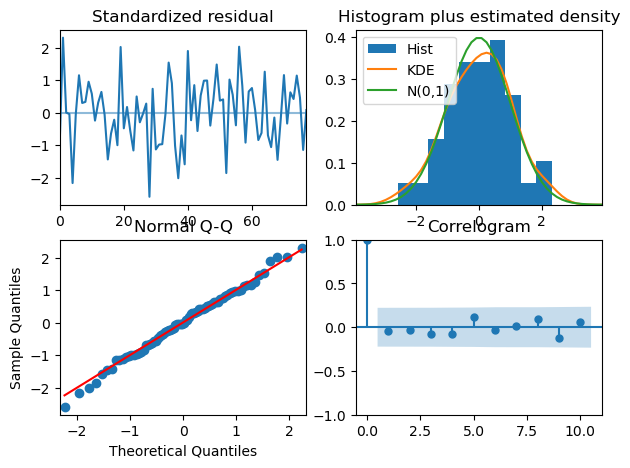

In [ ]:
# analyse résidus du model_fact_1

import matplotlib.pyplot as plt
model_fact_1.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
# graphique haut gauche 
# les résidus semblent évoluer dans le temps de manière uniforme autour de la moyenne

In [ ]:
# graphique haut droit
#nos résidus ont l'air de suivre une loi normale

In [ ]:
# graphique bas gauche
#la quasi-totalité des points sont alignés donc la distribution n'est pas biaisée

In [ ]:
# graphique bas droit
# les erreurs via le corrélogramme ne sont pas autocorrélées

In [ ]:
# regression du model_fact_1

from statsmodels.tsa.arima.model import ARIMA 

arima_model = ARIMA(df_factors.DR,x,trend='n', order=(0,0,3))
model_fact_1= arima_model.fit()
print(model_fact_1.summary())

                               SARIMAX Results                                
Dep. Variable:                     DR   No. Observations:                   78
Model:                 ARIMA(0, 0, 3)   Log Likelihood                  21.242
Date:                Sat, 19 Nov 2022   AIC                             47.516
Time:                        18:23:30   BIC                            153.568
Sample:                             0   HQIC                            89.971
                                 - 78                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
CD_TY_CLI_RCI_1            20.4822      0.049    420.788      0.000      20.387      20.578
CD_TY_CLI_RCI_2            21.3803      0.040    535.159      0.000      21.302      21.459


<AxesSubplot:xlabel='Serie'>

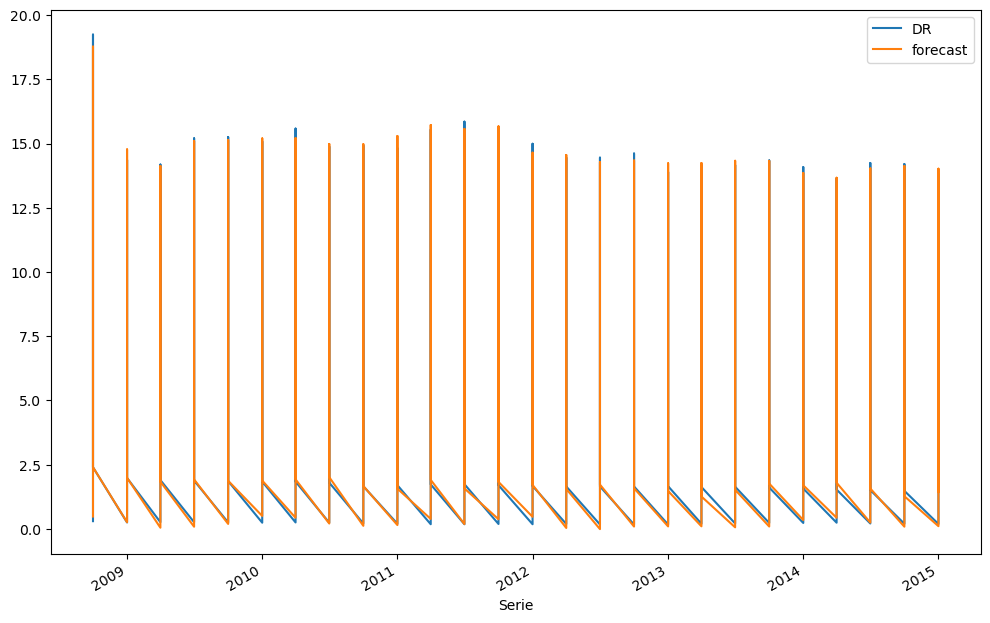

In [ ]:
# représentation forecast model_fact_1

df_factors['forecast']=model_fact_1.predict()
df_factors[['DR','forecast']].plot(figsize=(12,8))

## MODEL ARIMA

In [ ]:
# second model avec uniquement yt

In [ ]:
#ARIMA MODEL 
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model_fact_2 = pm.auto_arima(df_factors.DR,start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_fact_2.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=598.085, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=576.999, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=596.085, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=164.347, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=164.833, Time=0.30 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=166.556, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=168.525, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=163.631, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,1

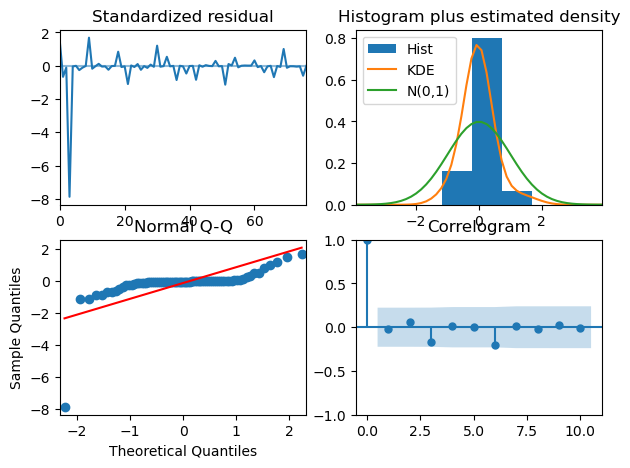

In [ ]:
# analyse résidu
import matplotlib.pyplot as plt
model_fact_2.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
# regression model2
arima_model = ARIMA(df_factors.DR,trend='n',order=(2,1,1))
model_fact_2= arima_model.fit()
print(model_fact_2.summary())

                               SARIMAX Results                                
Dep. Variable:                     DR   No. Observations:                   78
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -77.816
Date:                Sat, 19 Nov 2022   AIC                            163.631
Time:                        18:20:10   BIC                            173.007
Sample:                             0   HQIC                           167.381
                                 - 78                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9996      0.092    -10.922      0.000      -1.179      -0.820
ar.L2         -0.9986      0.003   -292.729      0.000      -1.005      -0.992
ma.L1          0.0820      2.044      0.040      0.9

In [ ]:
# les résidus de nos yt fluctuent autour de la moyenne dans le temps et ils sont pas autocorrélés 
# mais en revanche ils ne suivent pas une loi normale et la distribution est biaisée au vu des écarts.

<AxesSubplot:xlabel='Serie'>

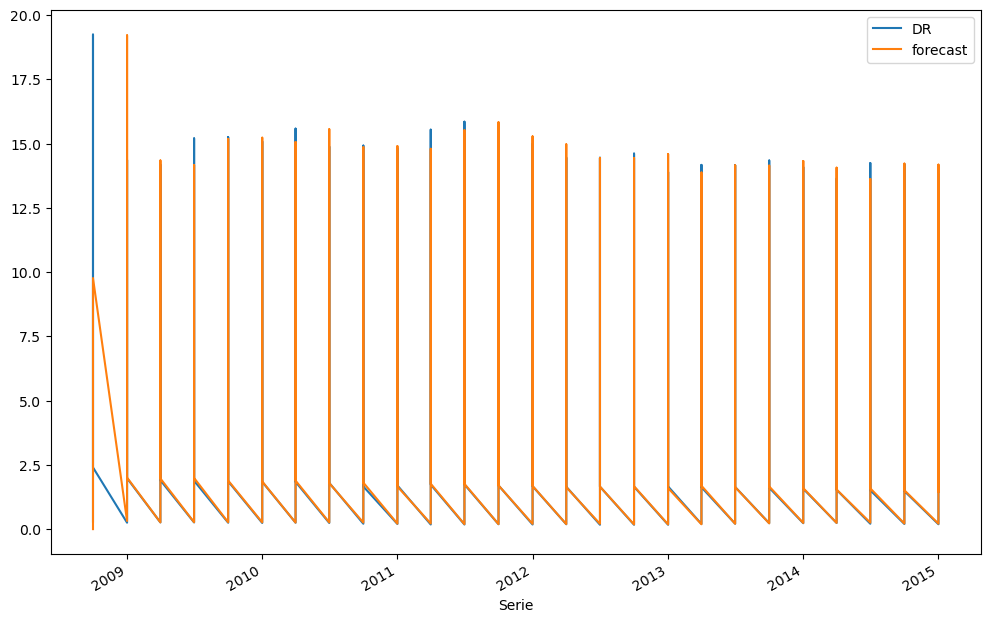

In [ ]:
# représentation graphique des prédictions
df_factors['forecast']=model_fact_2.predict()
df_factors[['DR','forecast']].plot(figsize=(12,8))

## modèle ARDL

In [ ]:
import datetime as dt
df_factors['Serie'] = pd.to_datetime(df_factors['Serie'])
df_factors['Serie']=df_fatcors['Serie'].map(dt.datetime.toordinal)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA 

ARDL_model = ARDL(df_factors.DR, [1, 3], x, {"CD_ETA_CIV_2": 1, "CD_MOD_HABI_1": 3, "CD_MOD_HABI_2": 2})
model3= ARDL_model.fit()
print(model3.summary())

                              ARDL Model Results                              
Dep. Variable:                     DR   No. Observations:                   78
Model:               ARDL(3, 1, 3, 2)   Log Likelihood                 -32.606
Method:               Conditional MLE   S.D. of innovations              0.374
Date:                Thu, 10 Nov 2022   AIC                             91.212
Time:                        23:22:38   BIC                            121.340
Sample:                             3   HQIC                           103.242
                                   78                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0006      0.000      1.435      0.156      -0.000       0.002
DR.L1               -0.0820      0.116     -0.709      0.481      -0.313       0.149
DR.L3                0.1769 

In [ ]:
# je laisse le code pour le découpage des données en sous échantillon dont une test et l'autre training
# pour le machine learning

from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_factors[:39]
test = df_factors[39:]

In [ ]:
# code pour les mesures de précision sur la qualité de prédictions

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

### méthode2 tugay après garde pas

### Elimination progressive des variables # Méthode 2

In [ ]:
MIS_corr = df.corr(method='spearman')
print(MIS_corr["DR"].sort_values(ascending=True))

CD_MOD_HABI_2   -0.968733
mean_7          -0.957678
p75_7           -0.944106
CD_QUAL_VEH_2   -0.938768
p90_7           -0.938620
                   ...   
mean_6           0.961429
p90_6            0.965024
p95_6            0.966403
CD_MOD_HABI_1    0.968733
DR               1.000000
Name: DR, Length: 82, dtype: float64


In [ ]:
comedy_high = MIS_corr['DR'].nlargest(60)
comedy_high

DR                         1.000000
CD_MOD_HABI_1              0.968733
p95_6                      0.966403
p90_6                      0.965024
mean_6                     0.961429
CD_QUAL_VEH_1              0.938768
p25_4                      0.911692
CD_TY_CLI_RCI_1            0.911161
p5_4                       0.900618
CD_PROF_2                  0.884663
CD_PROF_1                  0.880129
p75_6                      0.825546
median_6                   0.823066
p25_6                      0.822003
p10_4                      0.818074
CD_ETA_CIV_1               0.817923
mauvaise_qualité           0.816760
p10_6                      0.811102
p5_6                       0.651818
p25_5                      0.539427
median_5                   0.536340
mean_5                     0.505262
p90_4                      0.504944
p95_4                      0.502636
p10_5                      0.498090
mean_4                     0.493008
median_4                   0.491863
p75_4                      0

## je nettoie peu a peu la database

In [ ]:
df

,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,p95_1,mean_2,...,CD_QUAL_VEH_1,CD_QUAL_VEH_2,PIB,Inflation,Tx_cho,bonne_qualité,mauvaise_qualité,totalité_duportefeuille,Serie,dtf
0,0.30,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,0.997023,495,...,39.213,60.787,497736,1.760576,7.800000,1,0,0,2008-10-01,NaT
1,19.24,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,0.994793,147,...,54.851,45.149,497736,1.760576,7.800000,0,1,0,2008-10-01,NaT
2,2.40,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,0.999539,563,...,45.114,54.886,497736,1.760576,7.800000,0,0,1,2008-10-01,NaT
3,0.25,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,0.997025,515,...,37.666,62.334,489227,0.624887,8.600000,1,0,0,2009-01-01,NaT
4,14.36,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,0.995656,136,...,54.393,45.607,489227,0.624887,8.600000,0,1,0,2009-01-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,14.20,0.945045,0.954124,0.867099,0.890238,0.923678,0.976668,0.990908,0.994970,133,...,44.520,55.480,519315,0.277815,10.500000,0,1,0,2014-10-01,NaT
74,1.48,0.979524,0.993822,0.913891,0.941424,0.977598,0.998348,0.999386,0.999632,661,...,39.363,60.637,519315,0.277815,10.500000,0,0,1,2014-10-01,NaT
75,0.19,0.994820,0.995156,0.992071,0.992495,0.993647,0.996268,0.996839,0.997004,526,...,34.423,65.577,522560,-0.240585,10.366667,1,0,0,2015-01-01,NaT
76,13.81,0.944559,0.953416,0.866626,0.888926,0.922654,0.976460,0.990459,0.994596,126,...,44.973,55.027,522560,-0.240585,10.366667,0,1,0,2015-01-01,NaT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DR                       78 non-null     float64       
 1   mean_1                   78 non-null     float64       
 2   median_1                 78 non-null     float64       
 3   p5_1                     78 non-null     float64       
 4   p10_1                    78 non-null     float64       
 5   p25_1                    78 non-null     float64       
 6   p75_1                    78 non-null     float64       
 7   p90_1                    78 non-null     float64       
 8   p95_1                    78 non-null     float64       
 9   mean_2                   78 non-null     int64         
 10  median_2                 78 non-null     int64         
 11  p5_2                     78 non-null     int64         
 12  p10_2                    78 non-null  

In [ ]:
df=df.drop(columns=['p5_2','p10_2','mean_3','median_3','p5_3','p10_3','p25_3','p75_3','p90_3','p95_3','mean_4','median_4','p10_4'])


In [ ]:
df=df.drop(columns=['p5_6','p5_5','median_5','mean_5','p90_4','p95_4','p10_5','p75_4','p5_5','p75_5','Inflation','totalité_duportefeuille' ])


In [ ]:
MIS_corr = df.corr(method='spearman')
comedy_high = MIS_corr['DR'].nlargest(60)
comedy_high

DR                  1.000000
CD_MOD_HABI_1       0.968733
p95_6               0.966403
p90_6               0.965024
mean_6              0.961429
CD_QUAL_VEH_1       0.938768
p25_4               0.911692
CD_TY_CLI_RCI_1     0.911161
p5_4                0.900618
CD_PROF_2           0.884663
CD_PROF_1           0.880129
p75_6               0.825546
median_6            0.823066
p25_6               0.822003
CD_ETA_CIV_1        0.817923
mauvaise_qualité    0.816760
p10_6               0.811102
p25_5               0.539427
p5_8               -0.054362
Tx_cho             -0.215571
PIB                -0.226914
p90_5              -0.362459
p95_5              -0.392398
p75_1              -0.419775
p95_8              -0.430156
p90_8              -0.430445
p75_8              -0.440893
p90_1              -0.447801
p95_1              -0.449766
p90_2              -0.482633
p95_2              -0.486889
p5_7               -0.582486
p75_2              -0.611836
p25_7              -0.680223
mean_2        

In [ ]:
df=df.drop(columns=['p25_5','p5_8','Tx_cho','PIB','p90_5','p95_5','p90_8','p75_8','p90_1','p95_1','p90_2','p95_2', 'p5_7']) 


In [ ]:
MIS_corr = df.corr(method='spearman')
comedy_high = MIS_corr['DR'].nlargest(60)
comedy_high

DR                  1.000000
CD_MOD_HABI_1       0.968733
p95_6               0.966403
p90_6               0.965024
mean_6              0.961429
CD_QUAL_VEH_1       0.938768
p25_4               0.911692
CD_TY_CLI_RCI_1     0.911161
p5_4                0.900618
CD_PROF_2           0.884663
CD_PROF_1           0.880129
p75_6               0.825546
median_6            0.823066
p25_6               0.822003
CD_ETA_CIV_1        0.817923
mauvaise_qualité    0.816760
p10_6               0.811102
p75_1              -0.419775
p95_8              -0.430156
p75_2              -0.611836
p25_7              -0.680223
mean_2             -0.688388
p10_8              -0.762481
p10_7              -0.792076
mean_8             -0.792297
p25_1              -0.815782
bonne_qualité      -0.816760
CD_ETA_CIV_2       -0.817923
median_1           -0.827449
p10_1              -0.830077
p5_1               -0.846118
CD_PROF_3          -0.879970
median_7           -0.882328
mean_1             -0.903099
p25_8         

In [ ]:
df=df.drop(columns=['p75_1','p95_8']) 


In [ ]:
MIS_corr = df.corr(method='spearman')
comedy_high = MIS_corr['DR'].nsmallest(60)
comedy_high

CD_MOD_HABI_2      -0.968733
mean_7             -0.957678
p75_7              -0.944106
CD_QUAL_VEH_2      -0.938768
p90_7              -0.938620
median_8           -0.936502
median_2           -0.936136
p25_2              -0.919157
p95_7              -0.914148
CD_TY_CLI_RCI_2    -0.911161
p25_8              -0.909150
mean_1             -0.903099
median_7           -0.882328
CD_PROF_3          -0.879970
p5_1               -0.846118
p10_1              -0.830077
median_1           -0.827449
CD_ETA_CIV_2       -0.817923
bonne_qualité      -0.816760
p25_1              -0.815782
mean_8             -0.792297
p10_7              -0.792076
p10_8              -0.762481
mean_2             -0.688388
p25_7              -0.680223
p75_2              -0.611836
p10_6               0.811102
mauvaise_qualité    0.816760
CD_ETA_CIV_1        0.817923
p25_6               0.822003
median_6            0.823066
p75_6               0.825546
CD_PROF_1           0.880129
CD_PROF_2           0.884663
p5_4          

#Selection de modèle

In [ ]:
df

,DR,mean_1,median_1,p5_1,p10_1,p25_1,mean_2,median_2,p25_2,p75_2,...,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,bonne_qualité,mauvaise_qualité,Serie,dtf
0,0.30,0.994843,0.995192,0.992081,0.992530,0.993691,495,428,296,662,...,72.754,7.085,35.122,57.793,39.213,60.787,1,0,2008-10-01,NaT
1,19.24,0.945694,0.953968,0.870889,0.890246,0.924743,147,92,46,164,...,32.075,18.176,54.180,27.644,54.851,45.149,0,1,2008-10-01,NaT
2,2.40,0.975114,0.993819,0.909173,0.940773,0.978358,563,291,107,742,...,65.671,10.289,37.072,52.639,45.114,54.886,0,0,2008-10-01,NaT
3,0.25,0.994782,0.995192,0.992097,0.992579,0.993694,515,467,254,660,...,73.813,6.823,34.280,58.897,37.666,62.334,1,0,2009-01-01,NaT
4,14.36,0.947787,0.956417,0.870889,0.893328,0.927447,136,78,39,152,...,34.645,17.730,53.290,28.980,54.393,45.607,0,1,2009-01-01,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,14.20,0.945045,0.954124,0.867099,0.890238,0.923678,133,82,41,154,...,38.054,16.397,55.033,28.570,44.520,55.480,0,1,2014-10-01,NaT
74,1.48,0.979524,0.993822,0.913891,0.941424,0.977598,661,324,112,832,...,69.769,9.391,37.528,53.081,39.363,60.637,0,0,2014-10-01,NaT
75,0.19,0.994820,0.995156,0.992071,0.992495,0.993647,526,481,343,617,...,80.261,7.295,35.208,57.497,34.423,65.577,1,0,2015-01-01,NaT
76,13.81,0.944559,0.953416,0.866626,0.888926,0.922654,126,78,34,147,...,37.349,16.617,55.193,28.190,44.973,55.027,0,1,2015-01-01,NaT


In [ ]:
df = pd.get_dummies(df)


In [ ]:
import datetime as dt
df['Serie'] = pd.to_datetime(df['Serie'])
df['Serie']=df['Serie'].map(dt.datetime.toordinal)

### fin méthode2 tugay garde pas

In [ ]:
# on réalise un acf afin d'avoir l'ordre du terme MA(q)

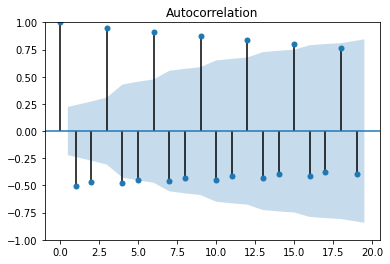

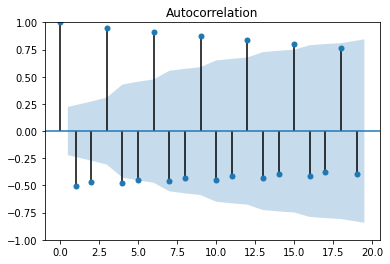

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["DR"],alpha=0.05)

In [ ]:
# Au seuil de 5%, on a des données qui sont significativement différentes de 0 donc IL y a un processus avec mémoire
# Ainsi on peut retenir un ordre de q=4

In [ ]:
# on fait la même chose avec le PACF pour l'ordre AR(p)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


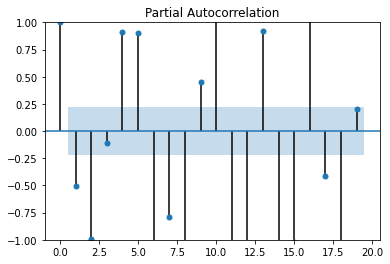

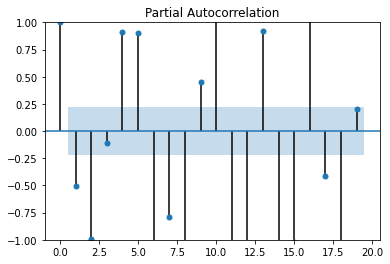

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['DR'], alpha=0.05) 

In [ ]:
# on peut retenir un ordre de p=2 au seuil de 5%

In [ ]:
# On teste l'autocorrelation des yt via le test de Ljung-Box
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df['DR'],lags=[3],return_df=True)

,lb_stat,lb_pvalue
3,112.572401,3.066743e-24


In [ ]:
# avec 3 retards on a une p-value < 5% donc on rejette l'hypothèse H0 qui est que nos données sont indépendantes
# Donc il y a un aspect temporel qui impact ces dernières

In [ ]:
# on réalise le test ADF afin de savoir si nos données sont non stationnaires
# H0: la série est non stationnaire 
# H1: la série est stationnaire

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.DR,regression="n")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.524172
p-value: 0.119652


In [ ]:
# on constate que la p-value est supèrieur à 5% donc on accepte H0 
#ainsi la série est non stationnaire sans constante et tendance 
# on refait le même test mais avec la constante uniquement puis avec constante et tendance

In [ ]:
# test avec constante
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.DR,regression="c")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.615949
p-value: 0.000001


In [ ]:
# la p-value est infèrieur à 5% donc on rejette H0 ainsi avec une constante les données sont stationnaires

In [ ]:
# test avec constante et tendance
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.DR,regression="ct")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.390920
p-value: 0.000000


In [ ]:
# p-vlaue infèrieur à 5% donc rejet de HO ainsi les données sont stationnaires en présence d'une constante et d'une tendance

In [ ]:
# On va réaliser un test KPSS afin de bien identifier le modèle à retenir pour les données 
# H0: la série est stationnaire autour d'une tendance déterministe ==> donc on a un processus TS
#H1: la série n'est pas stationnaire ==> alors on a un processus DS

In [ ]:
from statsmodels.tsa.stattools import kpss
from numpy import log
result = kpss(df.DR,regression="ct")
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

KPSS Statistic: 0.050425
p-value: 0.100000


C:\Users\Corentin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:
# p-value est supèrieur à 5% donc on accepte H0 ainsi la série est stationnaire autour d'une tendance déterministe
# par conséquence pour nos données yt on a affaire à un processus TS et donc le modèle à retenir est un modèle ARMA

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df=df.set_index(df['Serie'])

In [ ]:
df

,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,p95_1,mean_2,...,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho,bonne_qualité,mauvaise_qualité,totalité_duportefeuille,Serie,forecast
Serie,,,,,,,,,,,,,,,,,,,,,
2008-10-01,0.30,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,0.997023,495,...,60.787,Q42008,497736,1.760576,7.800000,1,0,0,2008-10-01,5.570331
2008-10-01,19.24,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,0.994793,147,...,45.149,Q42008,497736,1.760576,7.800000,0,1,0,2008-10-01,8.160737
2008-10-01,2.40,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,0.999539,563,...,54.886,Q42008,497736,1.760576,7.800000,0,0,1,2008-10-01,-2.577496
2009-01-01,0.25,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,0.997025,515,...,62.334,Q12009,489227,0.624887,8.600000,1,0,0,2009-01-01,-4.821226
2009-01-01,14.36,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,0.995656,136,...,45.607,Q12009,489227,0.624887,8.600000,0,1,0,2009-01-01,13.893417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-01,14.20,0.945045,0.954124,0.867099,0.890238,0.923678,0.976668,0.990908,0.994970,133,...,55.480,Q4 2014,519315,0.277815,10.500000,0,1,0,2014-10-01,NaN
2014-10-01,1.48,0.979524,0.993822,0.913891,0.941424,0.977598,0.998348,0.999386,0.999632,661,...,60.637,Q4 2014,519315,0.277815,10.500000,0,0,1,2014-10-01,NaN
2015-01-01,0.19,0.994820,0.995156,0.992071,0.992495,0.993647,0.996268,0.996839,0.997004,526,...,65.577,Q1 2015,522560,-0.240585,10.366667,1,0,0,2015-01-01,NaN


In [ ]:
arima_model = ARIMA(df.DR, order=(2,0,0))
model= arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                     DR   No. Observations:                   78
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -119.667
Date:                Thu, 10 Nov 2022   AIC                            247.333
Time:                        21:41:48   BIC                            256.760
Sample:                             0   HQIC                           251.107
                                 - 78                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5703      0.064     87.268      0.000       5.445       5.695
ar.L1         -0.9765      0.019    -51.341      0.000      -1.014      -0.939
ar.L2         -0.9867      0.012    -81.455      0.0

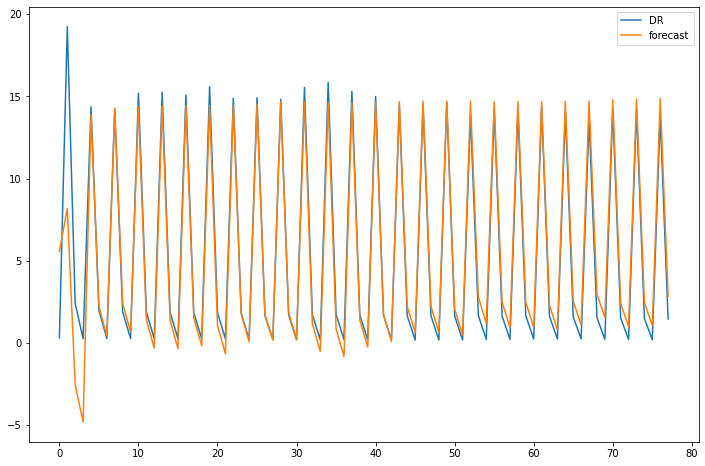

In [ ]:
df['forecast']=model.predict()
df[['DR','forecast']].plot(figsize=(12,8))


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.1 MB/s 
     |████████████████████████████████| 9.9 MB 46.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 3.8 MB/s 
     |████████████████████████████████| 9.9 MB 29.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
df

,DR,mean_1,median_1,p5_1,p10_1,p25_1,mean_2,median_2,p25_2,p75_2,...,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,bonne_qualité,mauvaise_qualité,Serie,dtf,forecast
0,0.30,0.994843,0.995192,0.992081,0.992530,0.993691,495,428,296,662,...,7.085,35.122,57.793,39.213,60.787,1,0,733316,NaT,5.570331
1,19.24,0.945694,0.953968,0.870889,0.890246,0.924743,147,92,46,164,...,18.176,54.180,27.644,54.851,45.149,0,1,733316,NaT,8.160737
2,2.40,0.975114,0.993819,0.909173,0.940773,0.978358,563,291,107,742,...,10.289,37.072,52.639,45.114,54.886,0,0,733316,NaT,-2.577496
3,0.25,0.994782,0.995192,0.992097,0.992579,0.993694,515,467,254,660,...,6.823,34.280,58.897,37.666,62.334,1,0,733408,NaT,-4.821226
4,14.36,0.947787,0.956417,0.870889,0.893328,0.927447,136,78,39,152,...,17.730,53.290,28.980,54.393,45.607,0,1,733408,NaT,13.893417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,14.20,0.945045,0.954124,0.867099,0.890238,0.923678,133,82,41,154,...,16.397,55.033,28.570,44.520,55.480,0,1,735507,NaT,14.820363
74,1.48,0.979524,0.993822,0.913891,0.941424,0.977598,661,324,112,832,...,9.391,37.528,53.081,39.363,60.637,0,0,735507,NaT,2.442505
75,0.19,0.994820,0.995156,0.992071,0.992495,0.993647,526,481,343,617,...,7.295,35.208,57.497,34.423,65.577,1,0,735599,NaT,1.049853
76,13.81,0.944559,0.953416,0.866626,0.888926,0.922654,126,78,34,147,...,16.617,55.193,28.190,44.973,55.027,0,1,735599,NaT,14.859727


In [ ]:
x=df.drop(columns=['DR','dtf'])


In [ ]:
#teste avec toute les variables ===== MODEL ARIMAX
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model1 = pm.auto_arima(df.DR, x,start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=82.457, Time=0.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=339.691, Time=0.44 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=78.022, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=78.852, Time=0.75 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=74.260, Time=0.75 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=71.914, Time=0.76 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=74.013, Time=0.83 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=78.269, Time=0.77 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=74.002, Time=0.83 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 6.427 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   78
Model:               SARIMAX(3, 0, 0)   Log Likelihood                  12.043
Date:                Thu, 10 Nov 2022   AIC                       

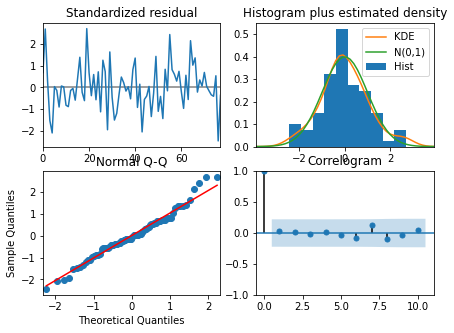

In [ ]:
import matplotlib.pyplot as plt
model1.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
#ARIMA MODEL 
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model2 = pm.auto_arima(df.DR,start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model2.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=598.085, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=576.999, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=596.085, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=164.347, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=164.833, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=166.556, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=168.547, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=163.631, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,1

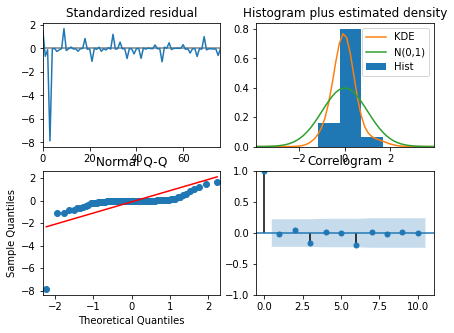

In [ ]:
import matplotlib.pyplot as plt
model2.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA 

arima_model = ARIMA(df.DR, order=(2,1,1))
model2= arima_model.fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                     DR   No. Observations:                   78
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -77.816
Date:                Thu, 10 Nov 2022   AIC                            163.631
Time:                        21:50:27   BIC                            173.007
Sample:                             0   HQIC                           167.381
                                 - 78                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9996      0.092    -10.922      0.000      -1.179      -0.820
ar.L2         -0.9986      0.003   -292.691      0.000      -1.005      -0.992
ma.L1          0.0820      2.044      0.040      0.9

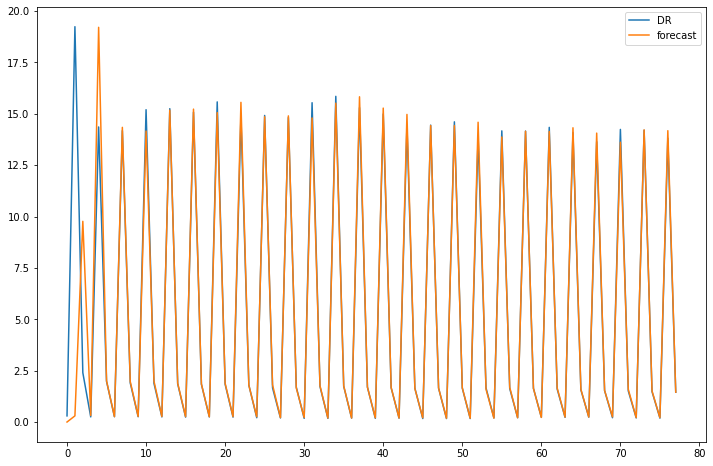

In [ ]:
df['forecast']=model2.predict()
df[['DR','forecast']].plot(figsize=(12,8))


In [ ]:
from statsmodels.tsa.api import ARDL

In [ ]:
x

,mean_1,median_1,p5_1,p10_1,p25_1,mean_2,median_2,p25_2,p75_2,p5_4,...,CD_ETA_CIV_2,CD_MOD_HABI_1,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,bonne_qualité,mauvaise_qualité
0,0.994843,0.995192,0.992081,0.992530,0.993691,495,428,296,662,-3,...,63.074,27.246,72.754,7.085,35.122,57.793,39.213,60.787,1,0
1,0.945694,0.953968,0.870889,0.890246,0.924743,147,92,46,164,6,...,35.988,67.925,32.075,18.176,54.180,27.644,54.851,45.149,0,1
2,0.975114,0.993819,0.909173,0.940773,0.978358,563,291,107,742,5,...,58.121,34.329,65.671,10.289,37.072,52.639,45.114,54.886,0,0
3,0.994782,0.995192,0.992097,0.992579,0.993694,515,467,254,660,-1,...,64.090,26.187,73.813,6.823,34.280,58.897,37.666,62.334,1,0
4,0.947787,0.956417,0.870889,0.893328,0.927447,136,78,39,152,6,...,37.314,65.355,34.645,17.730,53.290,28.980,54.393,45.607,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.945045,0.954124,0.867099,0.890238,0.923678,133,82,41,154,6,...,34.379,61.946,38.054,16.397,55.033,28.570,44.520,55.480,0,1
74,0.979524,0.993822,0.913891,0.941424,0.977598,661,324,112,832,4,...,55.783,30.231,69.769,9.391,37.528,53.081,39.363,60.637,0,0
75,0.994820,0.995156,0.992071,0.992495,0.993647,526,481,343,617,1,...,61.030,19.739,80.261,7.295,35.208,57.497,34.423,65.577,1,0
76,0.944559,0.953416,0.866626,0.888926,0.922654,126,78,34,147,6,...,33.931,62.651,37.349,16.617,55.193,28.190,44.973,55.027,0,1


In [ ]:
x=x.drop(columns=['Serie'])

# Cross validation

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_log_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
from pandas.tseries.offsets import MonthEnd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARMA
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [277]:
df=pd.read_table('construct_red.txt', delimiter = ',')

In [201]:
df

,TRIMESTRE,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,...,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho
0,2008Q4,CHR2,0.30%,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,...,72.754%,7.085%,35.122%,57.793%,39.213%,60.787%,Q42008,497736,1.760576,7.800000
1,2008Q4,CHR8,19.24%,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,...,32.075%,18.176%,54.180%,27.644%,54.851%,45.149%,Q42008,497736,1.760576,7.800000
2,2008Q4,Totale,2.40%,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,...,65.671%,10.289%,37.072%,52.639%,45.114%,54.886%,Q42008,497736,1.760576,7.800000
3,2009Q1,CHR2,0.25%,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,...,73.813%,6.823%,34.280%,58.897%,37.666%,62.334%,Q12009,489227,0.624887,8.600000
4,2009Q1,CHR8,14.36%,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,...,34.645%,17.730%,53.290%,28.980%,54.393%,45.607%,Q12009,489227,0.624887,8.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2014Q4,CHR8,14.20%,0.945045,0.954124,0.867099,0.890238,0.923678,0.976668,0.990908,...,38.054%,16.397%,55.033%,28.570%,44.520%,55.480%,Q4 2014,519315,0.277815,10.500000
74,2014Q4,Totale,1.48%,0.979524,0.993822,0.913891,0.941424,0.977598,0.998348,0.999386,...,69.769%,9.391%,37.528%,53.081%,39.363%,60.637%,Q4 2014,519315,0.277815,10.500000
75,2015Q1,CHR2,0.19%,0.994820,0.995156,0.992071,0.992495,0.993647,0.996268,0.996839,...,80.261%,7.295%,35.208%,57.497%,34.423%,65.577%,Q1 2015,522560,-0.240585,10.366667
76,2015Q1,CHR8,13.81%,0.944559,0.953416,0.866626,0.888926,0.922654,0.976460,0.990459,...,37.349%,16.617%,55.193%,28.190%,44.973%,55.027%,Q1 2015,522560,-0.240585,10.366667


In [278]:
df['Serie']=pd.to_datetime(df['TRIMESTRE'])
df=df.drop(columns=['TRIMESTRE'])

In [203]:
df

,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,p95_1,...,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho,Serie
0,CHR2,0.30%,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,0.997023,...,7.085%,35.122%,57.793%,39.213%,60.787%,Q42008,497736,1.760576,7.800000,2008-10-01
1,CHR8,19.24%,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,0.994793,...,18.176%,54.180%,27.644%,54.851%,45.149%,Q42008,497736,1.760576,7.800000,2008-10-01
2,Totale,2.40%,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,0.999539,...,10.289%,37.072%,52.639%,45.114%,54.886%,Q42008,497736,1.760576,7.800000,2008-10-01
3,CHR2,0.25%,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,0.997025,...,6.823%,34.280%,58.897%,37.666%,62.334%,Q12009,489227,0.624887,8.600000,2009-01-01
4,CHR8,14.36%,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,0.995656,...,17.730%,53.290%,28.980%,54.393%,45.607%,Q12009,489227,0.624887,8.600000,2009-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,CHR8,14.20%,0.945045,0.954124,0.867099,0.890238,0.923678,0.976668,0.990908,0.994970,...,16.397%,55.033%,28.570%,44.520%,55.480%,Q4 2014,519315,0.277815,10.500000,2014-10-01
74,Totale,1.48%,0.979524,0.993822,0.913891,0.941424,0.977598,0.998348,0.999386,0.999632,...,9.391%,37.528%,53.081%,39.363%,60.637%,Q4 2014,519315,0.277815,10.500000,2014-10-01
75,CHR2,0.19%,0.994820,0.995156,0.992071,0.992495,0.993647,0.996268,0.996839,0.997004,...,7.295%,35.208%,57.497%,34.423%,65.577%,Q1 2015,522560,-0.240585,10.366667,2015-01-01
76,CHR8,13.81%,0.944559,0.953416,0.866626,0.888926,0.922654,0.976460,0.990459,0.994596,...,16.617%,55.193%,28.190%,44.973%,55.027%,Q1 2015,522560,-0.240585,10.366667,2015-01-01


In [279]:
df.set_index("Serie", inplace=True)
df.head()

,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,p95_1,...,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho
Serie,,,,,,,,,,,,,,,,,,,,,
2008-10-01,CHR2,0.30%,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,0.997023,...,72.754%,7.085%,35.122%,57.793%,39.213%,60.787%,Q42008,497736,1.760576,7.8
2008-10-01,CHR8,19.24%,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,0.994793,...,32.075%,18.176%,54.180%,27.644%,54.851%,45.149%,Q42008,497736,1.760576,7.8
2008-10-01,Totale,2.40%,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,0.999539,...,65.671%,10.289%,37.072%,52.639%,45.114%,54.886%,Q42008,497736,1.760576,7.8
2009-01-01,CHR2,0.25%,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,0.997025,...,73.813%,6.823%,34.280%,58.897%,37.666%,62.334%,Q12009,489227,0.624887,8.6
2009-01-01,CHR8,14.36%,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,0.995656,...,34.645%,17.730%,53.290%,28.980%,54.393%,45.607%,Q12009,489227,0.624887,8.6


In [209]:
df.head()

,CHRONIQUE,DR,mean_1,median_1,p5_1,p10_1,p25_1,p75_1,p90_1,p95_1,...,CD_MOD_HABI_2,CD_PROF_1,CD_PROF_2,CD_PROF_3,CD_QUAL_VEH_1,CD_QUAL_VEH_2,dtf_per_trt,PIB,Inflation,Tx_cho
Serie,,,,,,,,,,,,,,,,,,,,,
2008-10-01,CHR2,0.30%,0.994843,0.995192,0.992081,0.992530,0.993691,0.996259,0.996862,0.997023,...,72.754%,7.085%,35.122%,57.793%,39.213%,60.787%,Q42008,497736,1.760576,7.8
2008-10-01,CHR8,19.24%,0.945694,0.953968,0.870889,0.890246,0.924743,0.976024,0.990229,0.994793,...,32.075%,18.176%,54.180%,27.644%,54.851%,45.149%,Q42008,497736,1.760576,7.8
2008-10-01,Totale,2.40%,0.975114,0.993819,0.909173,0.940773,0.978358,0.998133,0.999224,0.999539,...,65.671%,10.289%,37.072%,52.639%,45.114%,54.886%,Q42008,497736,1.760576,7.8
2009-01-01,CHR2,0.25%,0.994782,0.995192,0.992097,0.992579,0.993694,0.996275,0.996862,0.997025,...,73.813%,6.823%,34.280%,58.897%,37.666%,62.334%,Q12009,489227,0.624887,8.6
2009-01-01,CHR8,14.36%,0.947787,0.956417,0.870889,0.893328,0.927447,0.978988,0.991735,0.995656,...,34.645%,17.730%,53.290%,28.980%,54.393%,45.607%,Q12009,489227,0.624887,8.6


In [190]:
from statsmodels.tsa.tsatools import lagmat


In [280]:
# je convertis certaines variables xt object en float64
df['bonne_qualité'] = np.where(df['CHRONIQUE']== 'CHR2', 1, 0)
df['mauvaise_qualité'] = np.where(df['CHRONIQUE']== 'CHR8', 1, 0)
df['totalité_duportefeuille'] = np.where(df['CHRONIQUE']== 'Totale', 1, 0)
df['CD_TY_CLI_RCI_1'] = df['CD_TY_CLI_RCI_1'].str.rstrip("%").astype(float)
df['CD_TY_CLI_RCI_2'] = df['CD_TY_CLI_RCI_2'].str.rstrip("%").astype(float)
df['CD_ETA_CIV_1'] = df['CD_ETA_CIV_1'].str.rstrip("%").astype(float)
df['CD_ETA_CIV_2'] = df['CD_ETA_CIV_2'].str.rstrip("%").astype(float)

df['CD_MOD_HABI_1'] = df['CD_MOD_HABI_1'].str.rstrip("%").astype(float)
df['CD_MOD_HABI_2'] = df['CD_MOD_HABI_2'].str.rstrip("%").astype(float)

df['CD_PROF_1'] = df['CD_PROF_1'].str.rstrip("%").astype(float)
df['CD_PROF_2'] = df['CD_PROF_2'].str.rstrip("%").astype(float)
df['CD_PROF_3'] = df['CD_PROF_3'].str.rstrip("%").astype(float)

df['CD_QUAL_VEH_1'] = df['CD_QUAL_VEH_1'].str.rstrip("%").astype(float)
df['CD_QUAL_VEH_2'] = df['CD_QUAL_VEH_2'].str.rstrip("%").astype(float)
df=df.drop(columns=['CHRONIQUE'])
df['DR'] = df['DR'].str.rstrip("%").astype(float)

In [281]:
df=df.drop(columns=['p75_1','p95_8']) 
df=df.drop(columns=['p25_5','p5_8','Tx_cho','PIB','p90_5','p95_5','p90_8','p75_8','p90_1','p95_1','p90_2','p95_2', 'p5_7']) 
df=df.drop(columns=['p5_6','p5_5','median_5','mean_5','p90_4','p95_4','p10_5','p75_4','p5_5','p75_5','Inflation','totalité_duportefeuille' ])
df=df.drop(columns=['p5_2','p10_2','mean_3','median_3','p5_3','p10_3','p25_3','p75_3','p90_3','p95_3','mean_4','median_4','p10_4'])


In [282]:
df=df.drop(columns=['dtf_per_trt'])


In [283]:
X = df.drop(["DR"], axis=1)
Y = df["DR"]
X.shape, Y.shape

((78, 42), (78,))

In [23]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X, Y)

LinearRegression()

In [24]:
from sklearn.metrics import r2_score
r2_score(Y, clr.predict(X))

0.998630373562105

In [25]:
clr.coef_


array([-6.83474206e+00, -1.16670278e+03, -2.77086027e+02,  1.68790795e+02,
        3.74257894e+02, -3.92239495e-03,  1.64149410e-03, -3.65395531e-03,
        1.99254398e-03,  3.38256676e-02,  2.17249492e-01,  7.27183132e+03,
       -5.87482427e+03, -2.66386329e+03,  5.07969548e+03,  5.52452121e+03,
       -3.59641665e+03,  1.02229794e+03,  3.31913491e+00,  2.40001548e+00,
       -9.40181116e-01, -1.79442908e+00, -8.44883242e-01,  1.08367520e+00,
       -3.60013846e-01,  1.72021081e+01,  2.68890262e+01, -4.16434508e-01,
        1.59985616e+01, -7.95161243e-01,  7.95171322e-01, -7.56696261e-02,
        7.56715713e-02,  1.48731596e-01, -1.48722431e-01, -7.57279517e+01,
       -7.67735117e+01, -7.65972003e+01,  1.17554906e-01, -1.17561040e-01,
        1.02927355e+01, -6.93117014e+01])

In [165]:
n = X.shape[0]
X_train = X.iloc[:n * 2//3]
X_test = X.iloc[n * 2//3:]
Y_train = Y[:n * 2//3]
Y_test = Y[n * 2//3:]

In [44]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(df):
    data_train, data_test = df.iloc[train_index, :], df.iloc[test_index, :]
    print("TRAIN:", data_train.shape, "TEST:", data_test.shape)

TRAIN: (13, 43) TEST: (13, 43)
TRAIN: (26, 43) TEST: (13, 43)
TRAIN: (39, 43) TEST: (13, 43)
TRAIN: (52, 43) TEST: (13, 43)
TRAIN: (65, 43) TEST: (13, 43)


In [38]:
import warnings
from sklearn.ensemble import RandomForestRegressor
clr = RandomForestRegressor()

def train_test(clr, train_index, test_index):
    data_train = df.iloc[train_index, :]
    data_test = df.iloc[test_index, :]
    clr.fit(data_train.drop(["DR"], axis=1),
            data_train.values)
    r2 = r2_score(data_test.values,
                  clr.predict(data_test.drop(["DR"], axis=1).values))
    return r2

warnings.simplefilter("ignore")
last_test_index = None
for train_index, test_index in tscv.split(df):
    r2 = train_test(clr, train_index, test_index)
    if last_test_index is not None:
        r2_prime = train_test(clr, last_test_index, test_index)
        print(r2, r2_prime)
    else:
        print(r2)
    last_test_index = test_index

0.8926965106836643
0.9161884378903196 0.9299255208651074
0.936103097180046 0.9503712622231147
0.9608541968344807 0.9499513173913531
0.9394273590389592 0.9489355936742231


In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(data_test.values,
              clr.predict(data_test.drop(["DR"], axis=1).values))
r2

0.9489355936742231

##deuxième r=teste

In [284]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [285]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (58, 42)
Training Labels Shape: (58,)
Testing Features Shape: (20, 42)
Testing Labels Shape: (20,)


In [286]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [287]:
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.2 degrees.


In [288]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.61 %.


In [289]:
feature_list = list(X.columns)


In [290]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

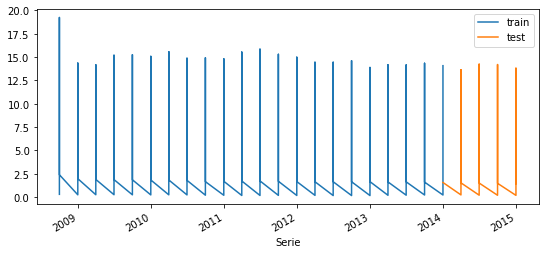

In [291]:
fig, ax=plt.subplots(figsize=(9, 4))
data_train['DR'].plot(ax=ax, label='train')
data_test['DR'].plot(ax=ax, label='test')
ax.legend();